In [43]:
from pyforest import*
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\ML project datasets\breastCancer.csv")

<IPython.core.display.Javascript object>

In [4]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### DATA PREPROCESSING

In [5]:
data.shape

(699, 11)

In [6]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [9]:
data.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [13]:
data['bare_nucleoli'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [17]:
data['bare_nucleoli'][data['bare_nucleoli']=='?'].value_counts()

?    16
Name: bare_nucleoli, dtype: int64

In [18]:
# We Have To Deal With The ? Mark In The Bare_Nucleoli Column And For Dealing with this What We Can Do Is We Can Convert This ? 
# Mark with nan with the help of numpy and Replace function.
 

df = data.replace('?',np.nan)

<IPython.core.display.Javascript object>

In [19]:
df  # Now this is the new dataframe which include NaN value irrespective of ? mark.

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [20]:
df.isnull().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [21]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [22]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [23]:
df['bare_nucleoli'] = df['bare_nucleoli'].fillna(df['bare_nucleoli'].median())

In [24]:
df.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [25]:
df['bare_nucleoli'][df['bare_nucleoli']==1]

23     1.0
40     1.0
139    1.0
145    1.0
158    1.0
164    1.0
235    1.0
249    1.0
275    1.0
292    1.0
294    1.0
297    1.0
315    1.0
321    1.0
411    1.0
617    1.0
Name: bare_nucleoli, dtype: object

In [28]:
df['bare_nucleoli']=df['bare_nucleoli'].astype('int64')

In [29]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

### EXPLORATORY DATA ANALYSIS

In [33]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [35]:
df = df.drop('id',axis=1) # we don't need the id columns so we drop it with the help of drop function.

In [37]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### BIVARAIATE DATA ANALYSIS

<IPython.core.display.Javascript object>

<Axes: xlabel='class', ylabel='Density'>

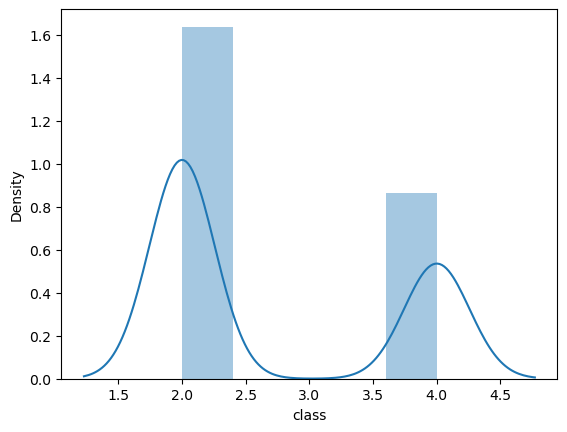

In [44]:
sns.distplot(df['class'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

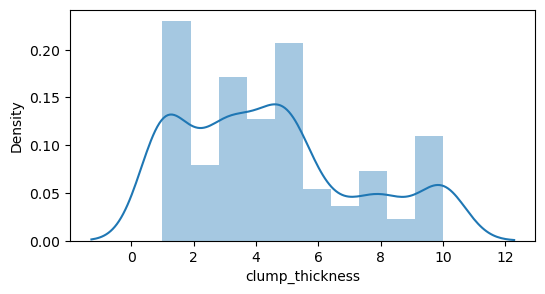

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

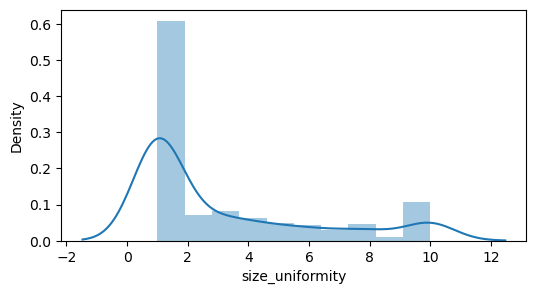

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

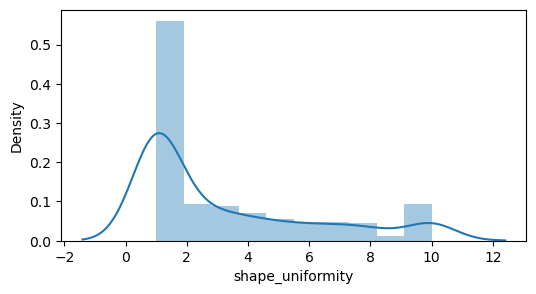

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

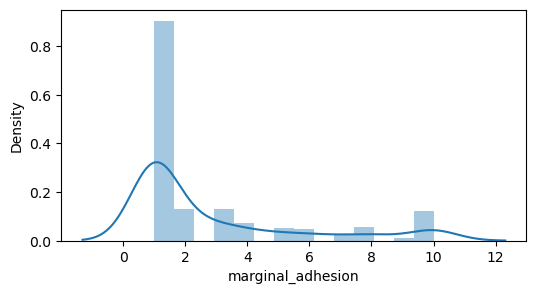

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

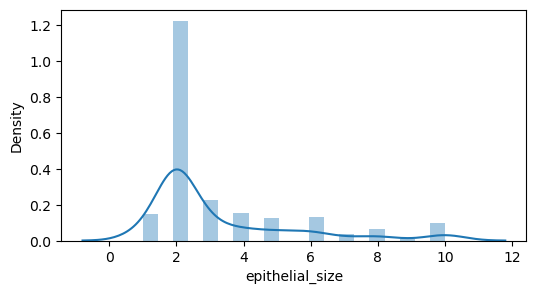

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

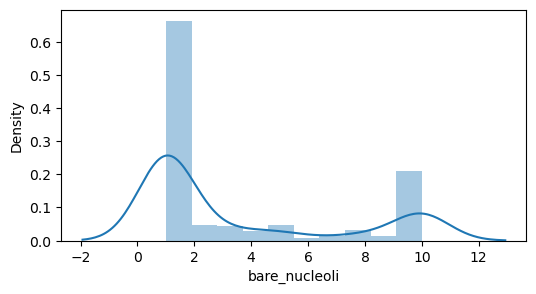

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

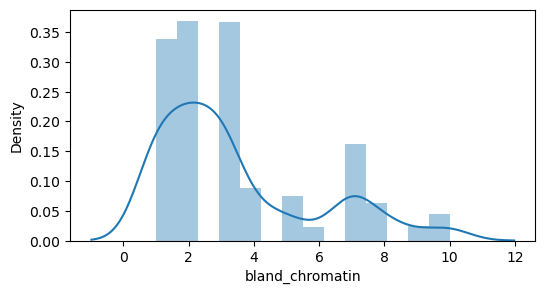

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

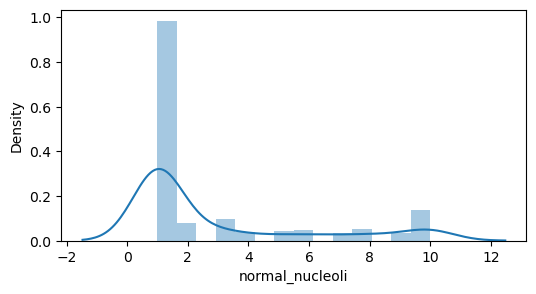

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

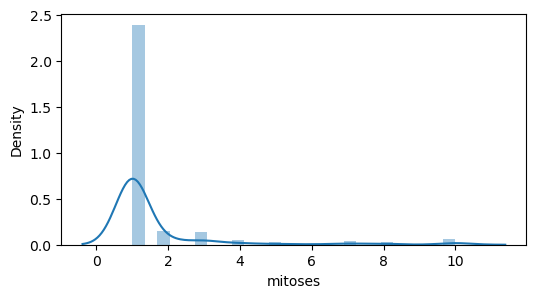

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

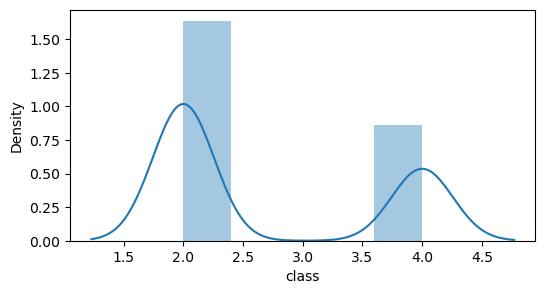

In [49]:
for i in df.describe().columns:
    plt.figure(figsize=(6,3))
    sns.distplot(df[i].dropna())
    plt.show()

### MULTIVARAIATE DATA ANALYSIS

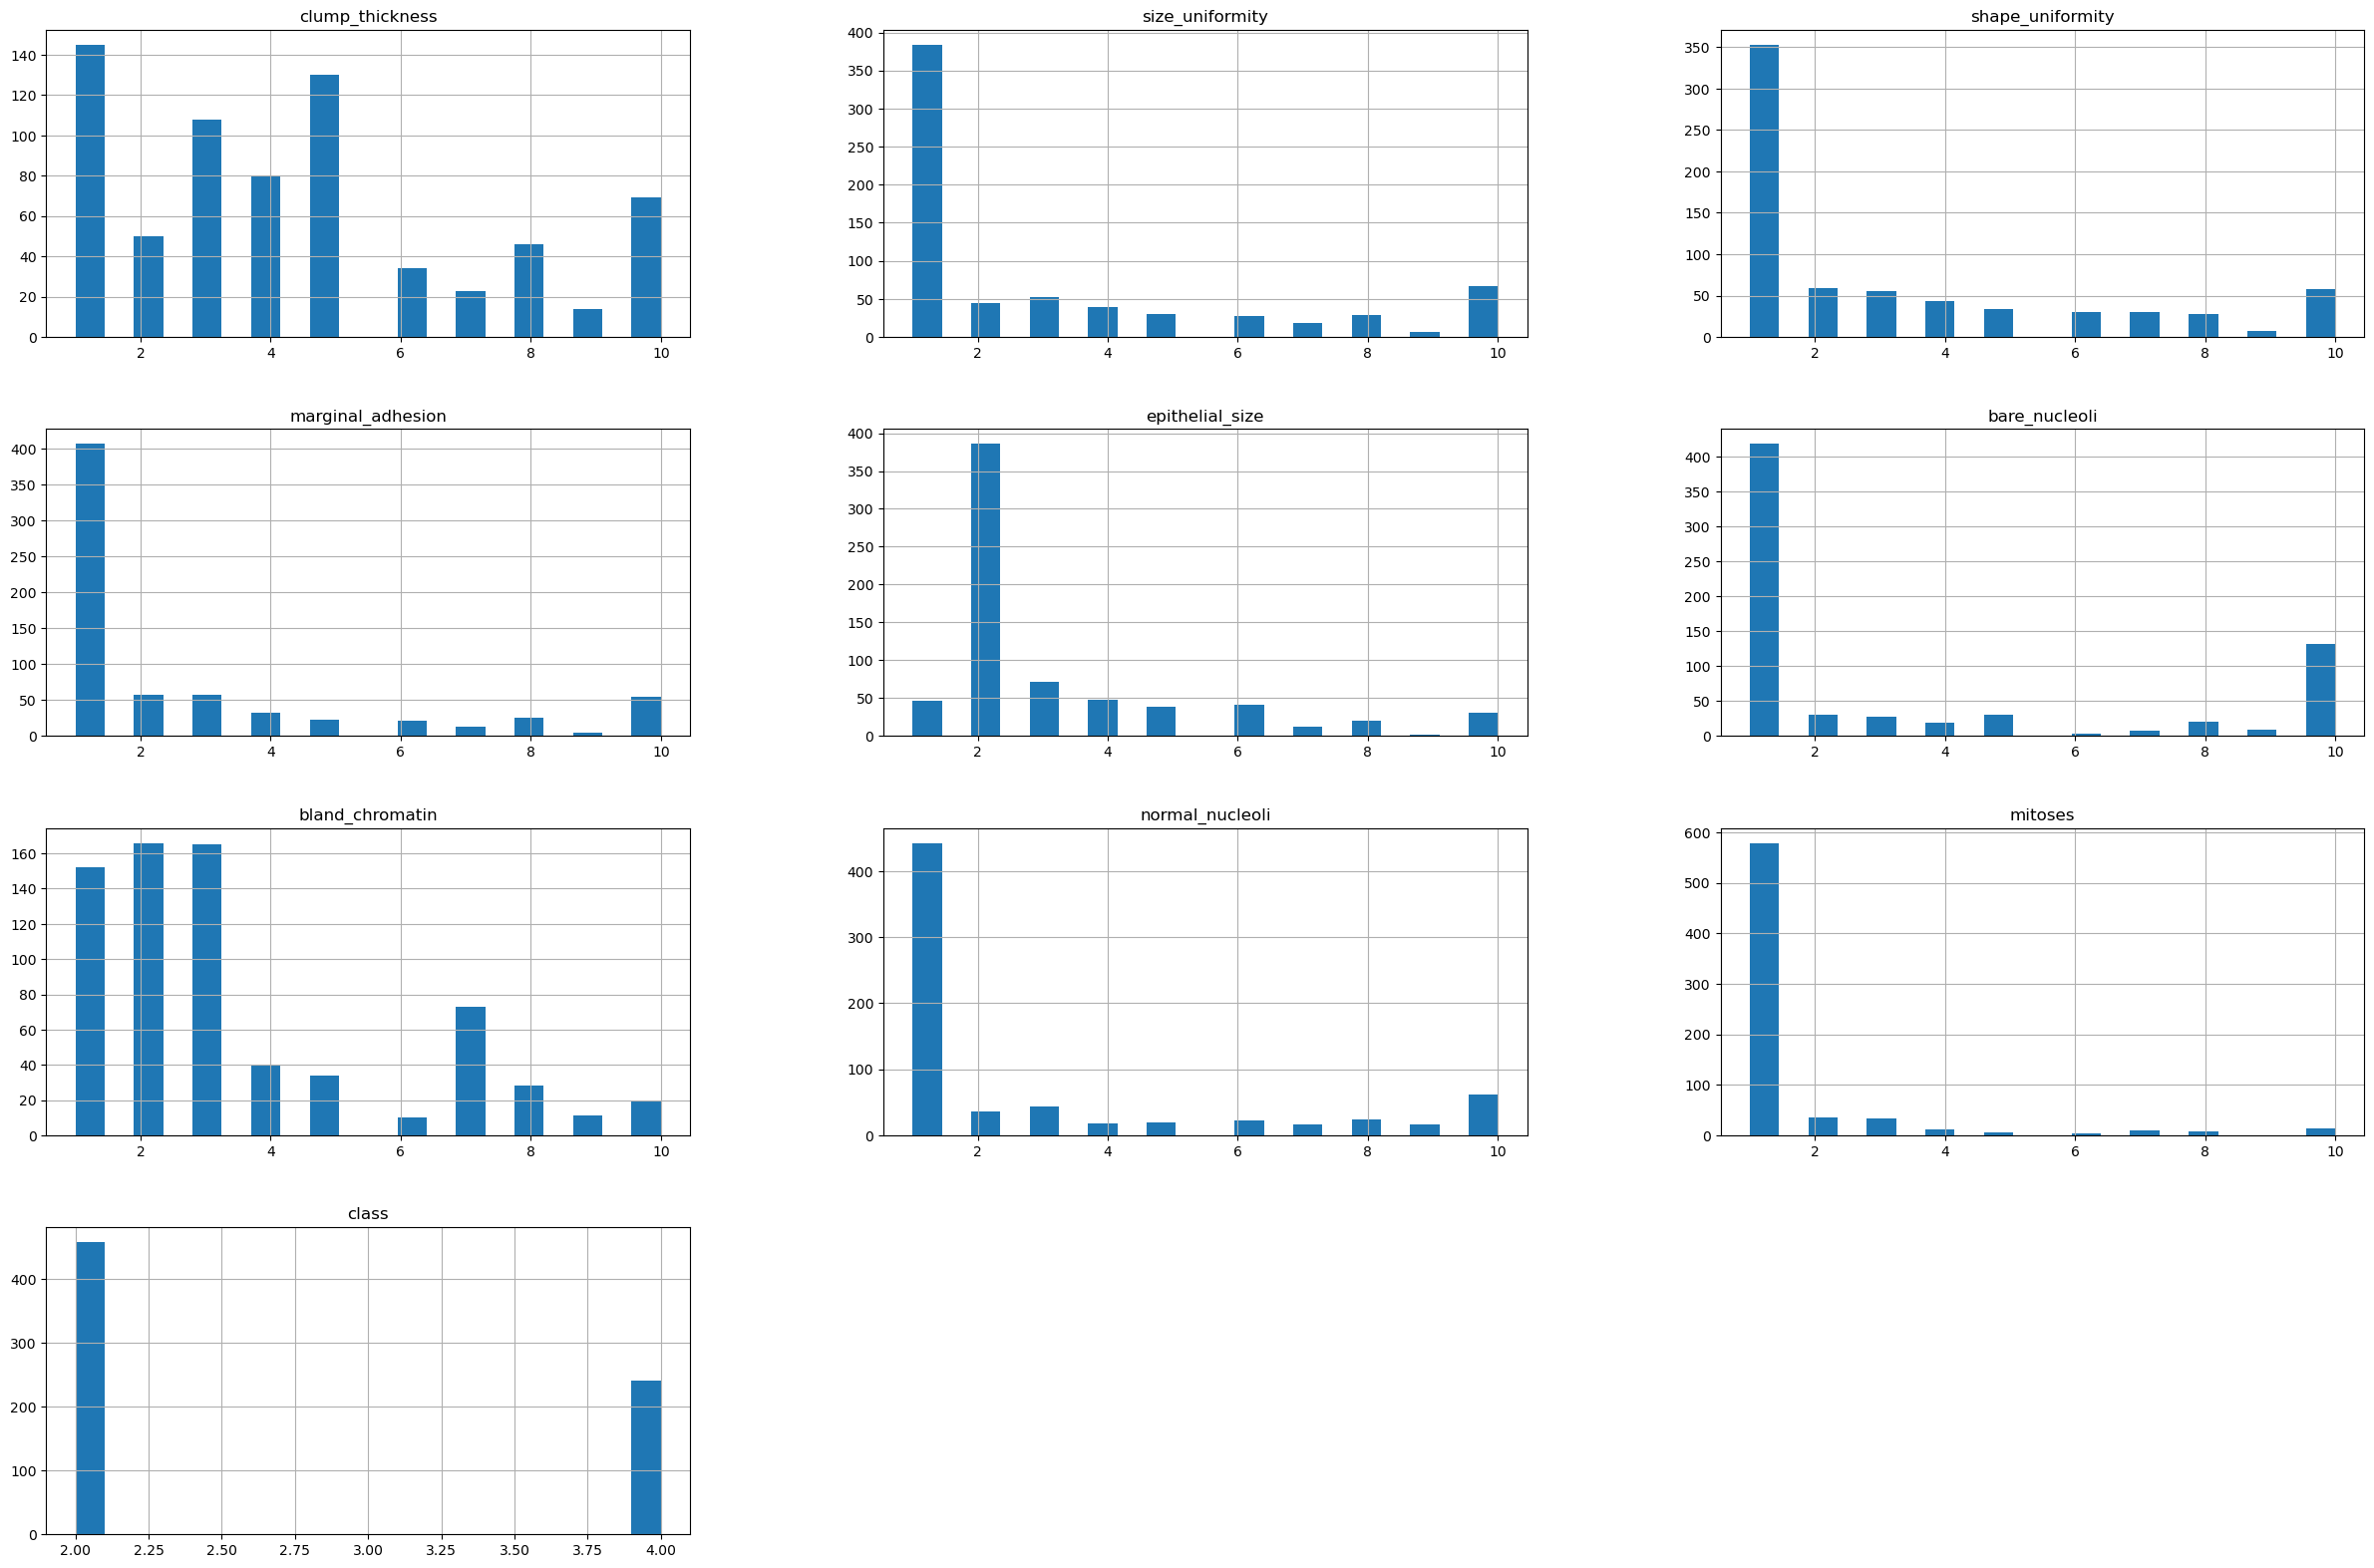

In [52]:
df.hist(bins=20,figsize=(30,30),layout=(6,3));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

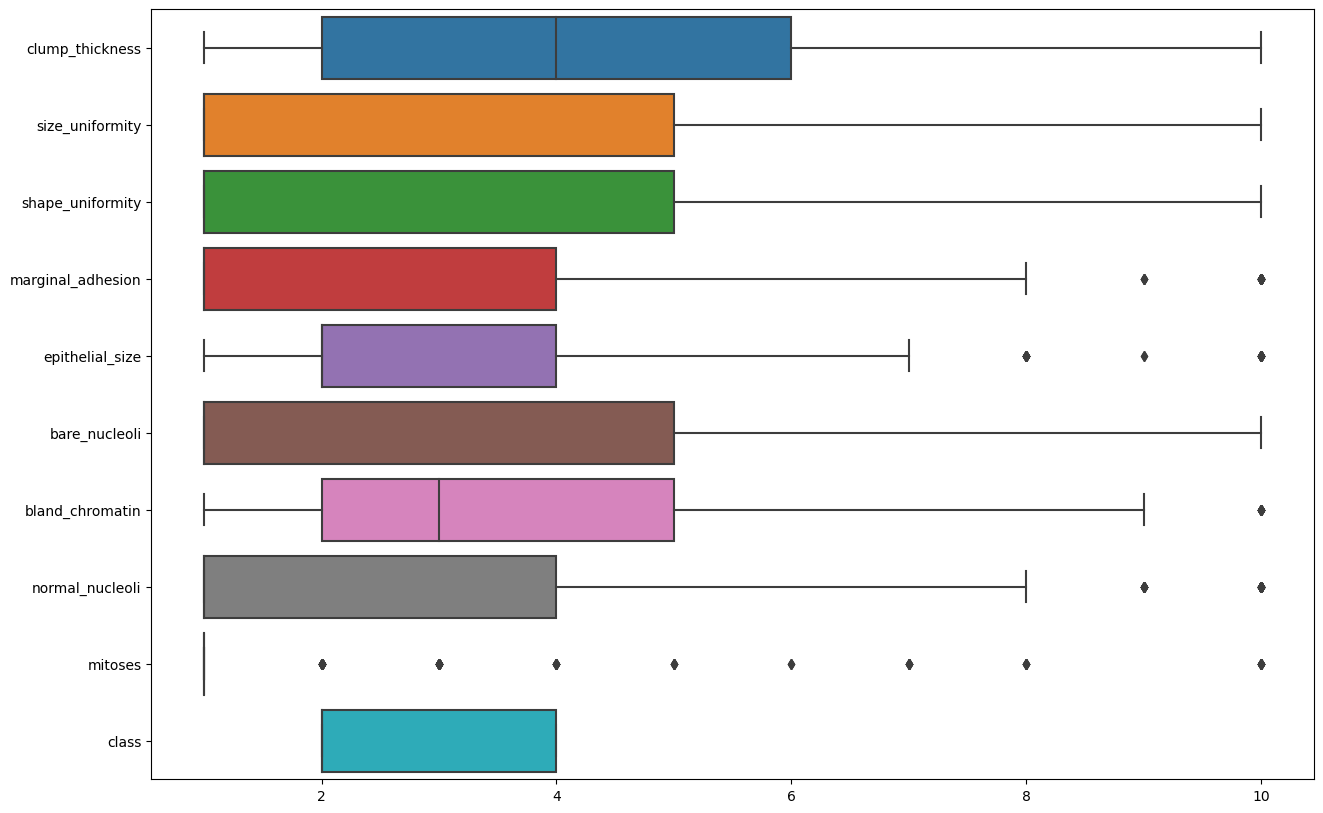

In [56]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

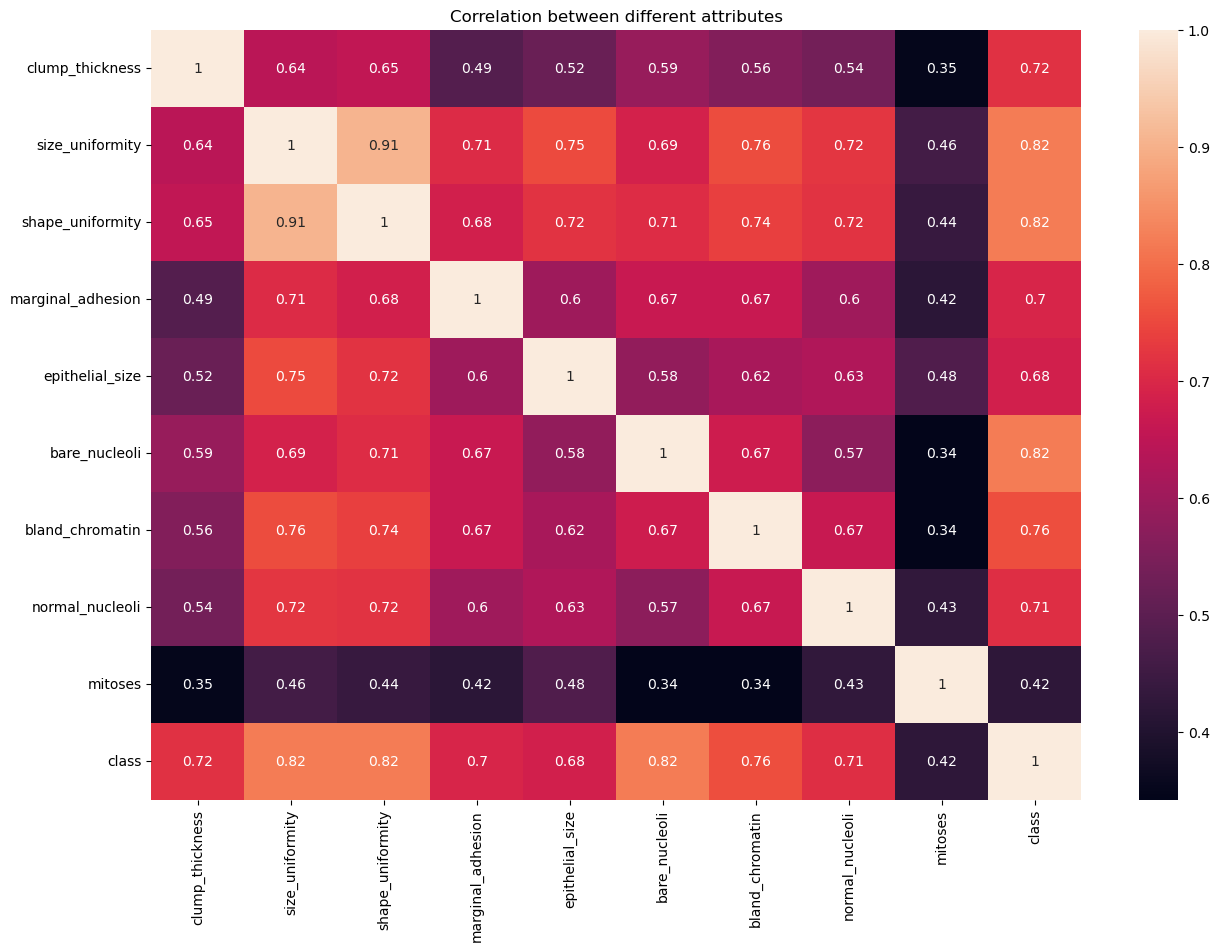

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between different attributes')
plt.show()

<IPython.core.display.Javascript object>

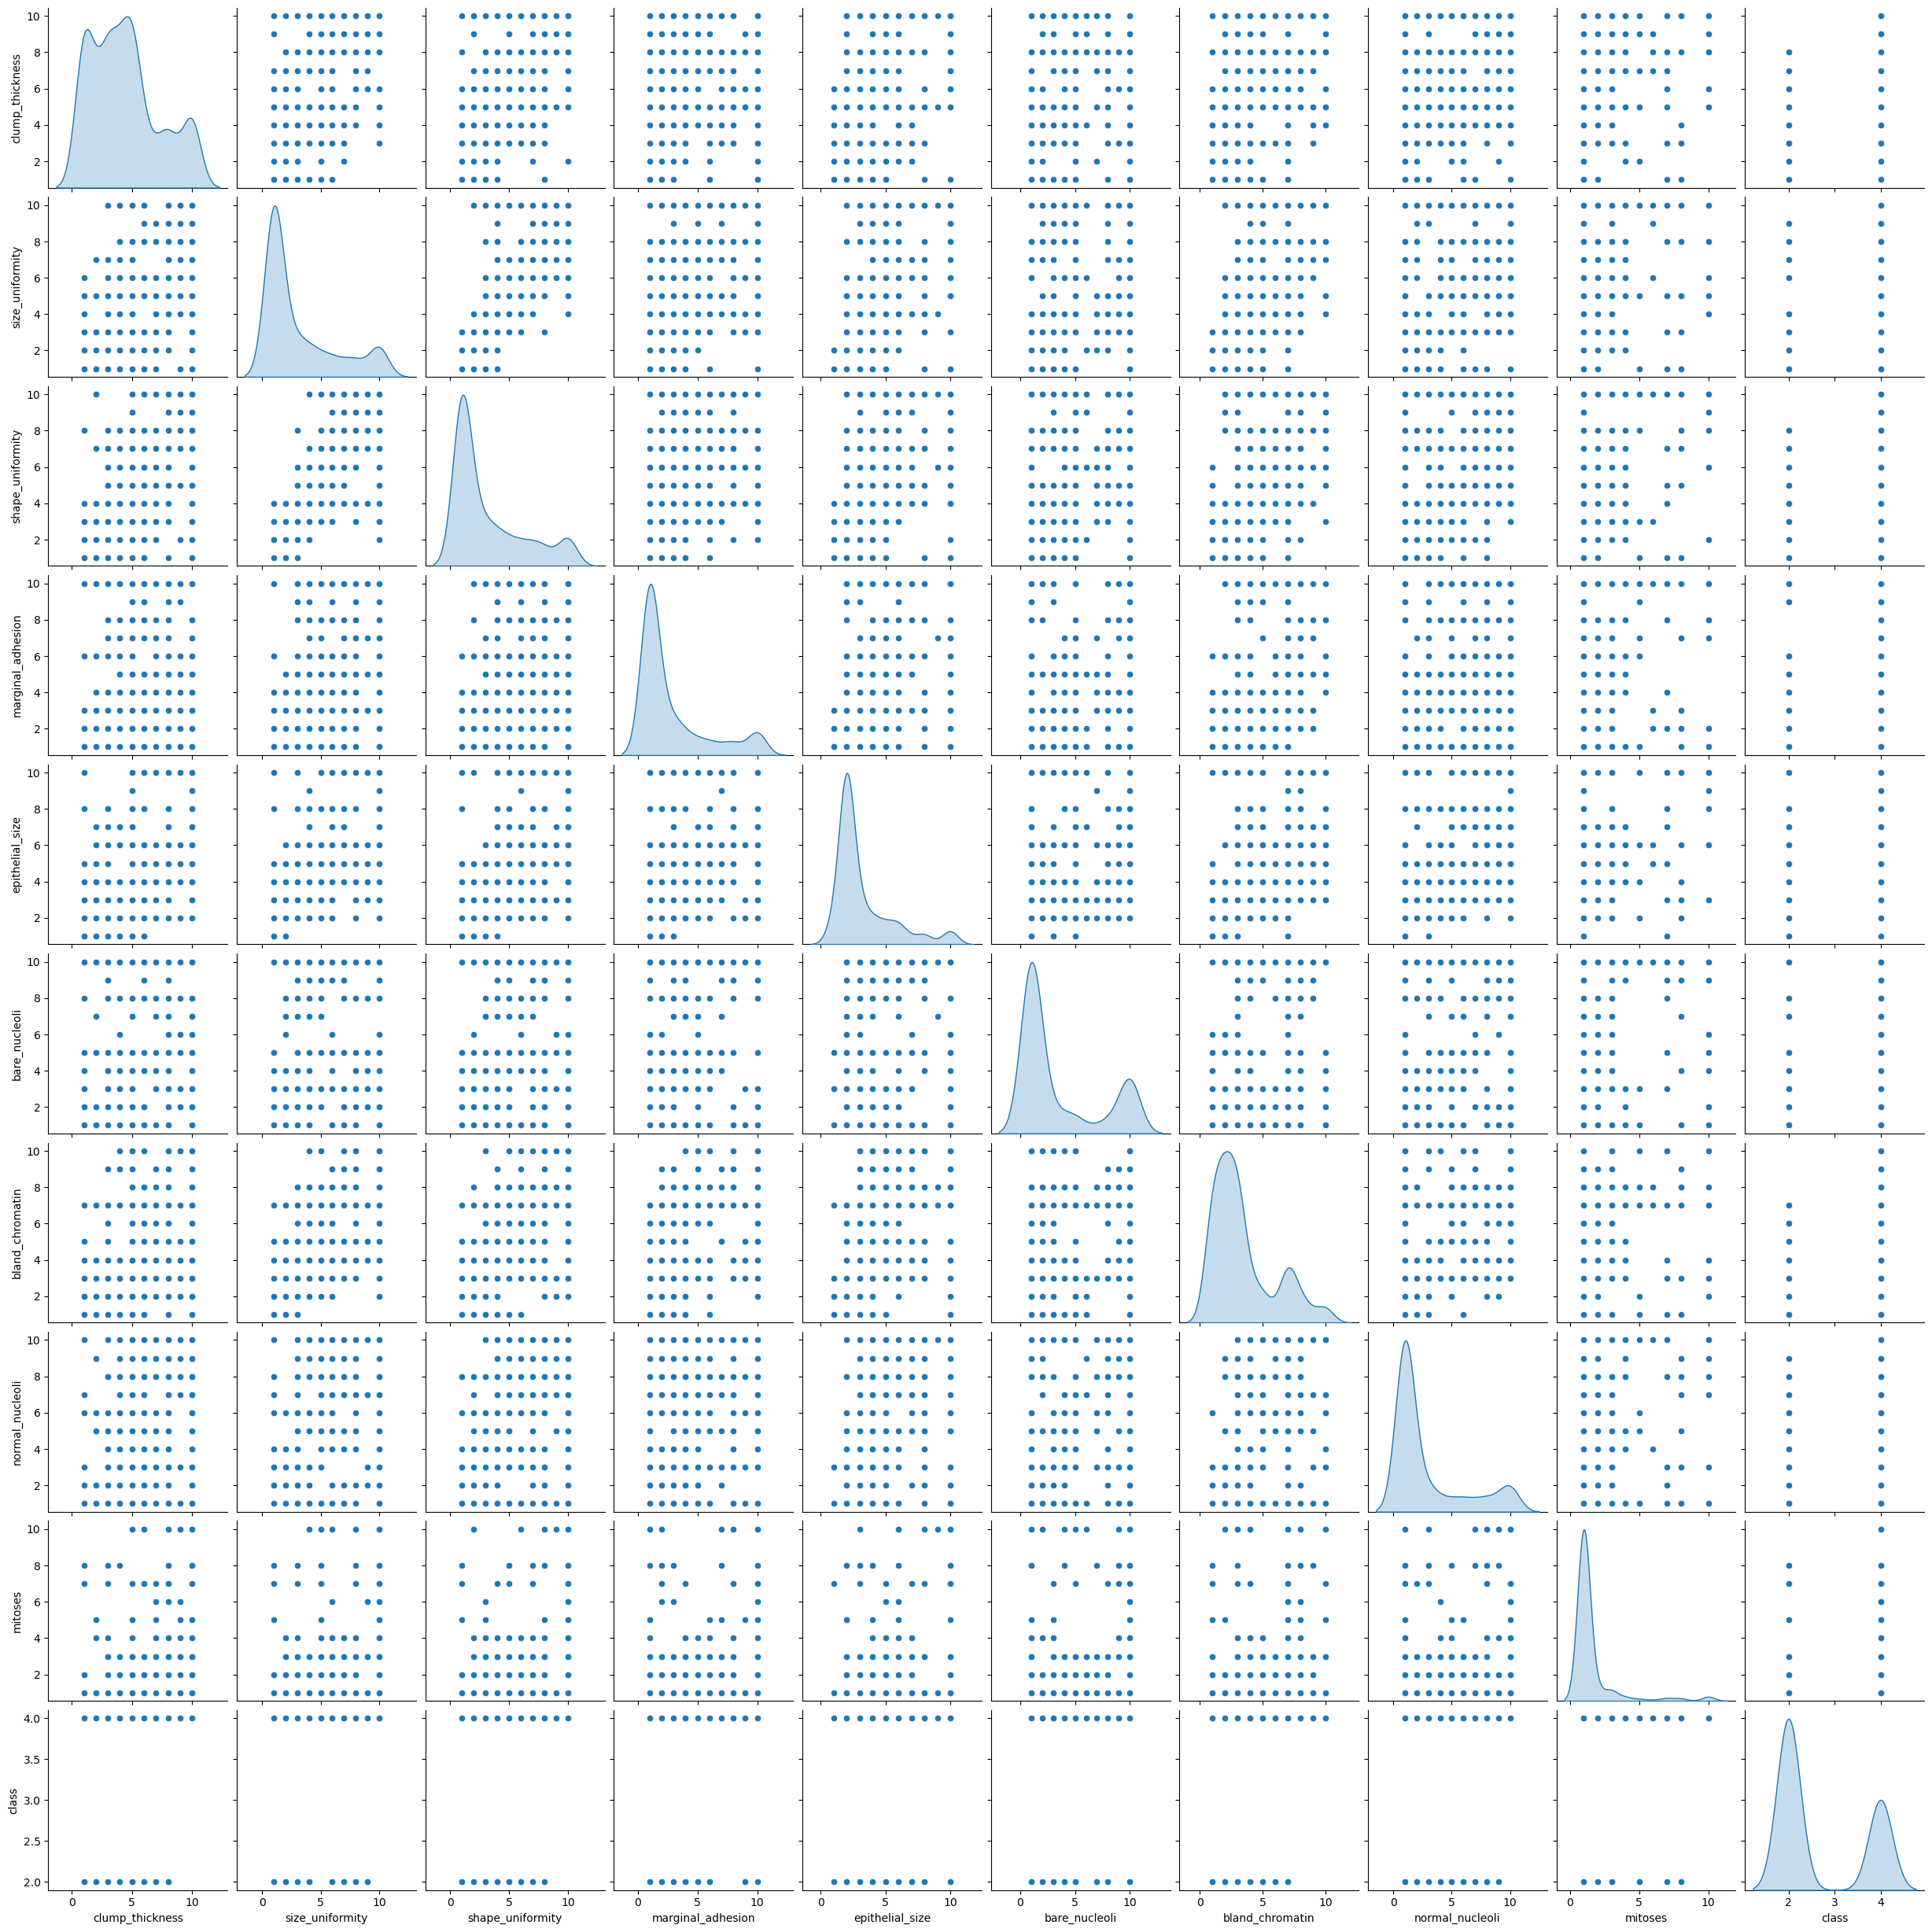

In [62]:
sns.pairplot(df,diag_kind='kde')

## BUILDING OUR MODEL

In [64]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [65]:
x = df.drop('class',axis=1)

In [66]:
y = df['class']

In [67]:
y = pd.DataFrame(y)

<IPython.core.display.Javascript object>

In [68]:
x.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [69]:
y.head()

,class
0,2
1,2
2,2
3,2
4,2


### KNN K Nearest Neighbors

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=2)

<IPython.core.display.Javascript object>

In [71]:
x_train.shape

(489, 9)

In [72]:
y_train.shape

(489, 1)

In [73]:
x_test.shape

(210, 9)

In [74]:
y_test.shape

(210, 1)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
params = {'n_neighbors':[5,10,15,20,25],
         'leaf_size':[10,20,30,40],
         'p':[2,4,6,8,10]}

gridcv = GridSearchCV(KNeighborsClassifier(),params,cv=10)

In [93]:
gridcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [5, 10, 15, 20, 25],
                         'p': [2, 4, 6, 8, 10]})

In [94]:
gridcv.best_params_ 

{'leaf_size': 10, 'n_neighbors': 5, 'p': 6}

In [95]:
knn_model = KNeighborsClassifier(leaf_size= 10, n_neighbors= 5, p=6)

In [96]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=10, p=6)

In [132]:
y_pred_1 =knn_model.predict(x_test)
print(y_pred_1)
print('The accuracy score for this model is ',metrics.accuracy_score(y_test,y_pred_1)*100)

[4 4 2 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 4 2 4 2 2 4
 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 4 4 2 2 2 2 2 2 4 2 4 4 2 4 2 2 2 4 2 2 2 4
 2 2 2 4 4 2 2 2 2 2 4 4 4 2 2 2 2 4 2 4 4 2 2 2 2 2 2 4 4 2 2 2 4 2 2 4 2
 4 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 2 2 4 2 2 2 4 2 4 2 2 2 4 2 2 4 4 2 2 4 2
 2 2 2 4 4 4 2 4 2 2 2 4 4 2 2 4 4 2 4 4 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 4 4
 4 2 4 2 2 2 4 2 4 2 4 2 4 2 4 4 2 2 2 2 4 2 2 2 2]


<IPython.core.display.Javascript object>

The accuracy score for this model is  95.71428571428572


In [136]:
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)

97.75051124744377
95.71428571428572


### SUPPORT VECTOR MACHINE

In [122]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear',degree=5)
model_svm.fit(x_train,y_train)

SVC(degree=5, kernel='linear')

In [134]:
y_pred_2 = model_svm.predict(x_test)
print(y_pred_2)
print('The accuracy score of support vector machine is ',metrics.accuracy_score(y_test,y_pred_2)*100)

[4 4 2 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 4 2 4 2 2 4
 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 4 4 2 2 2 2 2 2 4 2 4 4 2 4 2 2 2 4 2 2 2 4
 2 2 2 4 4 2 2 2 2 2 4 4 4 2 2 2 2 4 2 4 4 2 2 2 2 2 2 4 4 2 4 2 4 2 2 4 2
 4 2 2 4 2 4 2 2 2 2 4 2 2 2 2 4 2 2 4 2 2 2 4 2 4 2 2 2 4 2 2 4 4 2 2 4 2
 2 2 2 4 4 4 2 4 2 2 2 2 4 2 2 4 4 2 4 4 2 2 2 2 2 2 2 2 2 4 4 4 2 4 2 4 4
 4 2 4 2 2 2 4 2 4 2 4 2 4 2 4 4 2 2 2 2 4 2 2 2 2]


<IPython.core.display.Javascript object>

The accuracy score of support vector machine is  94.76190476190476


In [135]:
print(model_svm.score(x_train,y_train)*100)
print(model_svm.score(x_test,y_test)*100)

97.95501022494888
94.76190476190476


### MAKING A DATAFRAME WHICH INCLUDE KNN PREDICTION AS WELL AS SVM PREDICTION

In [137]:
knn_predictions = pd.DataFrame(y_pred_1)
svm_predictions = pd.DataFrame(y_pred_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
knn_predictions.head()

,0
0,4
1,4
2,2
3,2
4,2


In [140]:
svm_predictions.head()

,0
0,4
1,4
2,2
3,2
4,2


In [143]:
svm_predictions.shape

(210, 1)

In [146]:
mixed = [knn_predictions,svm_predictions]
new_df = pd.concat(mixed,axis=1)

<IPython.core.display.Javascript object>

In [147]:
new_df

,0,0
0,4,4
1,4,4
2,2,2
3,2,2
4,2,2
...,...,...
205,4,4
206,2,2
207,2,2
208,2,2


In [148]:
new_df.columns=[['knn_predictions','svm_predictions']]

In [149]:
new_df

,knn_predictions,svm_predictions
0,4,4
1,4,4
2,2,2
3,2,2
4,2,2
...,...,...
205,4,4
206,2,2
207,2,2
208,2,2


### CLASSIFICATION REPORT FOR KNN AND SVM

In [151]:
from sklearn.metrics import classification_report
clf_report_knn = classification_report(y_test,y_pred_1)

In [168]:
print('CLASSIFICATION REPORT FOR KNN')
print(clf_report_knn)

CLASSIFICATION REPORT FOR KNN
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       142
           4       0.93      0.94      0.93        68

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



In [155]:
clf_report_svm = classification_report(y_test,y_pred_2)

In [167]:
print('CLASSIFICATION REPORT FOR SVM')
print(clf_report_svm)

CLASSIFICATION REPORT FOR SVM
              precision    recall  f1-score   support

           2       0.97      0.95      0.96       142
           4       0.90      0.94      0.92        68

    accuracy                           0.95       210
   macro avg       0.94      0.95      0.94       210
weighted avg       0.95      0.95      0.95       210



### CONFUSION MATRIX FOR KNN AND SVM 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'CONFUSION MATRIX FOR KNN')

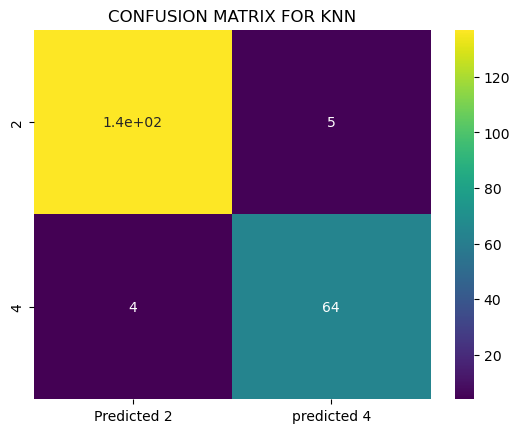

In [163]:
from sklearn.metrics import confusion_matrix
cm_knn =confusion_matrix(y_test,y_pred_1,labels = [2,4])
df_cm_knn = pd.DataFrame(cm_knn,index=[i for i in ['2','4']],
                                      columns =[i for i in ['Predicted 2','predicted 4']])
sns.heatmap(df_cm_knn,annot=True,cmap='viridis')
plt.title('CONFUSION MATRIX FOR KNN')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'CONFUSION MATRIX FOR SVM')

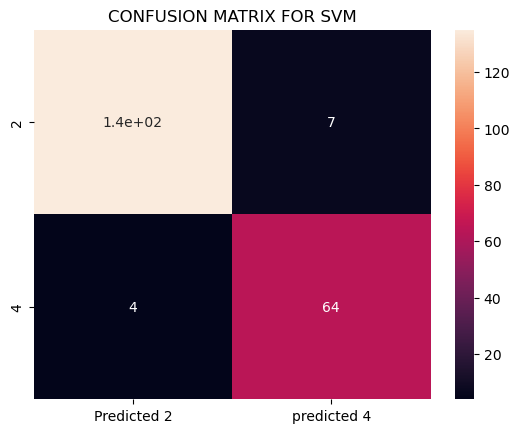

In [164]:
from sklearn.metrics import confusion_matrix
cm_svm =confusion_matrix(y_test,y_pred_2,labels = [2,4])
df_cm_svm = pd.DataFrame(cm_svm,index=[i for i in ['2','4']],
                                      columns =[i for i in ['Predicted 2','predicted 4']])
sns.heatmap(df_cm_svm,annot=True)
plt.title('CONFUSION MATRIX FOR SVM')

# HERE WE CAN SAY THAT KNN IS BETTER THAN SVM 